Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         7

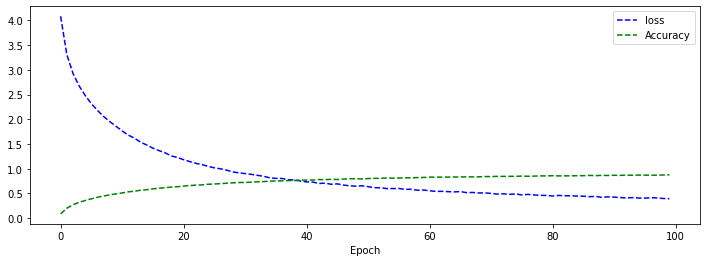

최적화 완료!

===========================test results===========================
313/313 - 1s - loss: 2.7403 - accuracy: 0.5042

 Accuracy: 0.5042


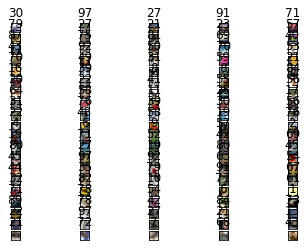

In [1]:
# cifar100

import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt

from keras.models import Sequential, Model
from keras.layers import Conv2D, Flatten, Dense, LSTM, Activation, Reshape, concatenate
from tensorflow.keras.optimizers import Adam
from keras.layers import BatchNormalization

# 데이터 로드
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data()

train_images = train_images / 255.0 # 0~1 정규화
test_images = test_images / 255.0

from tensorflow.keras.utils import to_categorical

# 원 핫 인코딩으로 변경
one_hot_train_labels = to_categorical(train_labels, 100)
one_hot_test_labels = to_categorical(test_labels, 100)


# model
model = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3), filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(Conv2D(filters = 256, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(Conv2D(filters = 512, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='swish')) # activation 함수로 swish를 사용
model.add(tf.keras.layers.Dropout(0.2))
model.add(BatchNormalization())

model.add(tf.keras.layers.Dense(100, activation='softmax'))

#학습과정 설정
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습 수행
history = model.fit(train_images, one_hot_train_labels, epochs=100, batch_size=64, verbose=0, validation_split=0.2)

# 모델이 학습되는 과정을 그래프로 표현
plt.figure(figsize=(12, 4))
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], 'b--', label='loss')
plt.plot(history.history['accuracy'], 'g--', label='Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
print('최적화 완료!')

# 모델 평가
print("\n===========================test results===========================")
labels = model.predict(test_images)

# .evaluate()함수의 반환값 : 평가된 [0]loss, [1]accuracy
print("\n Accuracy: %.4f" % (model.evaluate(test_images, one_hot_test_labels, verbose=2)[1])) # verbose=2로 설정하여 막대가 나오지 않도록 설정

# 테스트 영상 중 10개만 출력하고 예측결과를 그림 위에 표시해 보자.
fig = plt.figure()
for i in range(100):
  subplot = fig.add_subplot(20, 5, i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%s' % np.argmax(labels[i]))
  subplot.imshow(test_images[i].reshape(32, 32, 3))
plt.show()
print("\n==================================================================")